In [8]:
!pip install pandas-datareader

In [9]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [10]:
import numpy as np


In [11]:
df= pd.read_csv('Stock.csv')

In [12]:
df.head()

,DATE,Closing price,Opening Price,High price,Low price,Trading volume,Percentage change rate
0,8/1/2024,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,7/31/2024,160.4,158.2,160.7,158.1,173.91M,1.07%
2,7/30/2024,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,7/29/2024,159.7,158.7,160.2,158.4,126.28M,1.14%
4,7/26/2024,157.9,159.3,159.6,157.9,155.08M,-0.13%


Transforming to lowercase for convenince

In [13]:
df.tail()

,DATE,Closing price,Opening Price,High price,Low price,Trading volume,Percentage change rate
9197,2/18/1987,191.2,186.3,191.2,186.3,795.09M,4.82%
9198,2/17/1987,182.4,176.5,184.3,175.5,881.51M,3.93%
9199,2/16/1987,175.5,166.7,175.5,165.7,360.51M,1.74%
9200,2/13/1987,172.5,176.5,176.5,172.5,422.38M,-5.43%
9201,2/12/1987,182.4,182.4,182.4,182.4,1.28B,16.25%


In [14]:

df.columns = df.columns.str.strip().str.lower()
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

print(df.columns)


Index(['date', 'closing_price', 'opening_price', 'high_price', 'low_price',
       'trading_volume', 'percentage_change_rate'],
      dtype='object')


In [15]:
print(df.index)


RangeIndex(start=0, stop=9202, step=1)


Making 'date' has a colum

In [16]:
df.reset_index(inplace=True)
print(df.head())


   index       date  closing_price  opening_price  high_price  low_price  \
0      0   8/1/2024          156.3          159.3       159.4      156.1   
1      1  7/31/2024          160.4          158.2       160.7      158.1   
2      2  7/30/2024          158.7          158.8       159.2      158.0   
3      3  7/29/2024          159.7          158.7       160.2      158.4   
4      4  7/26/2024          157.9          159.3       159.6      157.9   

  trading_volume percentage_change_rate  
0         79.15M                 -2.56%  
1        173.91M                  1.07%  
2        138.14M                 -0.63%  
3        126.28M                  1.14%  
4        155.08M                 -0.13%  


CHECKING IF NULL VALUE PRESENCE


In [17]:
print(df.isnull().sum())

index                     0
date                      0
closing_price             0
opening_price             0
high_price                0
low_price                 0
trading_volume            0
percentage_change_rate    0
dtype: int64


In [18]:
df['date'] = pd.to_datetime(df['date'])

Removing M or B alphabates from voulume colum has machine doesn't understand aphbhates


In [19]:
def convert_trading_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    else:
        return float(volume)

df['trading_volume'] = df['trading_volume'].apply(convert_trading_volume)


In [20]:
df['percentage_change_rate'] = df['percentage_change_rate'].str.replace('%', '').astype(float)


In [21]:
df.drop_duplicates(inplace=True)


In [22]:
from scipy import stats
import numpy as np

df = df[(np.abs(stats.zscore(df[['closing_price', 'opening_price', 'high_price', 'low_price']])) < 3).all(axis=1)]


In [23]:
df = df.sort_values(by='date')


In [24]:
df = df[(df['closing_price'] >= 0) & (df['opening_price'] >= 0)]


In [25]:
df['daily_return'] = df['closing_price'].pct_change()


In [26]:
df.head()

,index,date,closing_price,opening_price,high_price,low_price,trading_volume,percentage_change_rate,daily_return
9201,9201,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,16.25,NaN
9200,9200,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43,-0.054276
9199,9199,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74,0.017391
9198,9198,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93,0.039316
9197,9197,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82,0.048246


In [27]:
# Remove or fill NaN values
df.dropna(inplace=True)

df['trading_volume'] = pd.to_numeric(df['trading_volume'], errors='coerce')

df['daily_return'] = df['closing_price'].pct_change()

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9016 entries, 9200 to 0
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   9016 non-null   int64         
 1   date                    9016 non-null   datetime64[ns]
 2   closing_price           9016 non-null   float64       
 3   opening_price           9016 non-null   float64       
 4   high_price              9016 non-null   float64       
 5   low_price               9016 non-null   float64       
 6   trading_volume          9016 non-null   float64       
 7   percentage_change_rate  9016 non-null   float64       
 8   daily_return            9015 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 704.4 KB
None


In [28]:
df.head()

,index,date,closing_price,opening_price,high_price,low_price,trading_volume,percentage_change_rate,daily_return
9200,9200,1987-02-13,172.5,176.5,176.5,172.5,422380000.0,-5.43,NaN
9199,9199,1987-02-16,175.5,166.7,175.5,165.7,360510000.0,1.74,0.017391
9198,9198,1987-02-17,182.4,176.5,184.3,175.5,881510000.0,3.93,0.039316
9197,9197,1987-02-18,191.2,186.3,191.2,186.3,795090000.0,4.82,0.048246
9196,9196,1987-02-19,196.1,196.1,196.1,193.1,748250000.0,2.56,0.025628


In [29]:

summary_stats = df[['closing_price', 'opening_price', 'high_price', 'low_price', 'trading_volume', 'percentage_change_rate']].describe()
print(summary_stats)

       closing_price  opening_price   high_price    low_price  trading_volume  \
count    9016.000000    9016.000000  9016.000000  9016.000000    9.016000e+03   
mean       88.544354      88.598181    89.480912    87.728583    1.736374e+08   
std        44.016957      44.096783    44.472715    43.732265    1.243233e+08   
min        33.000000      33.000000    33.200000    32.200000    9.340000e+06   
25%        51.800000      51.900000    52.400000    51.200000    8.300250e+07   
50%        83.900000      84.000000    84.800000    83.100000    1.551000e+08   
75%       108.025000     108.100000   109.700000   107.000000    2.316525e+08   
max       243.100000     243.100000   245.100000   241.200000    1.200000e+09   

       percentage_change_rate  
count             9016.000000  
mean                 0.014488  
std                  1.854397  
min                -14.740000  
25%                 -0.930000  
50%                  0.000000  
75%                  0.900000  
max           

In [30]:
skewness = df[['closing_price', 'opening_price', 'high_price', 'low_price', 'trading_volume']].skew()
kurtosis = df[['closing_price', 'opening_price', 'high_price', 'low_price', 'trading_volume']].kurtosis()
print('Skewness:\n', skewness)
print('Kurtosis:\n', kurtosis)

Skewness:
 closing_price     1.093005
opening_price     1.098675
high_price        1.095563
low_price         1.103313
trading_volume    1.722568
dtype: float64
Kurtosis:
 closing_price     1.090384
opening_price     1.114120
high_price        1.106517
low_price         1.127835
trading_volume    6.087210
dtype: float64


**Closing** **price**, **Opening** **price** , **high** **price** and **low** **price** - having positive skewness, it suggests that there may be som days of when prices spiked higher than average, which is common in stock data.

**Trading** **Volume**-
Positive skewness in trading volume might suggest that there are certain days with exceptionally high trading activity, possibly due to market events or news.

<Axes: >

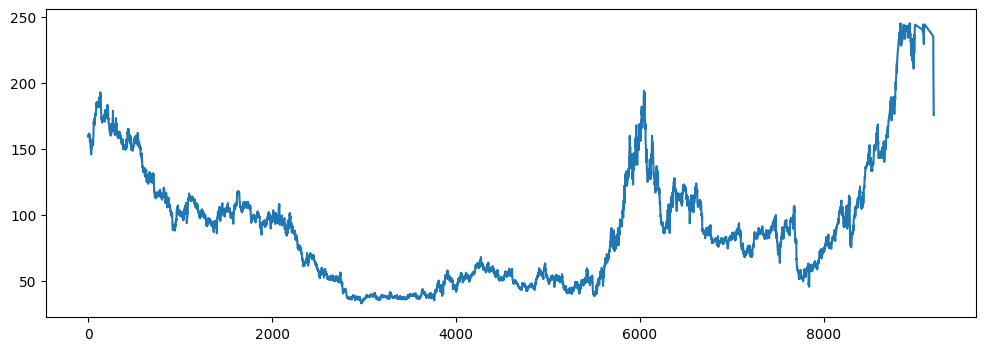

In [31]:
df['high_price'].plot(figsize=(12,4))

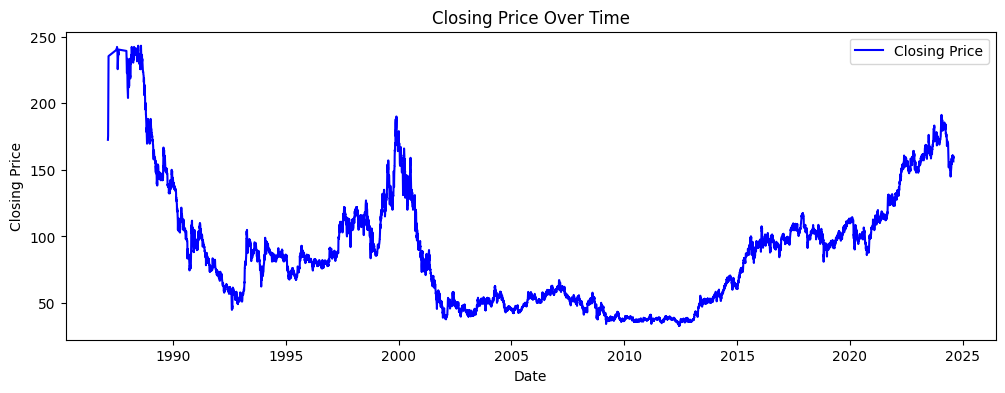

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['closing_price'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()


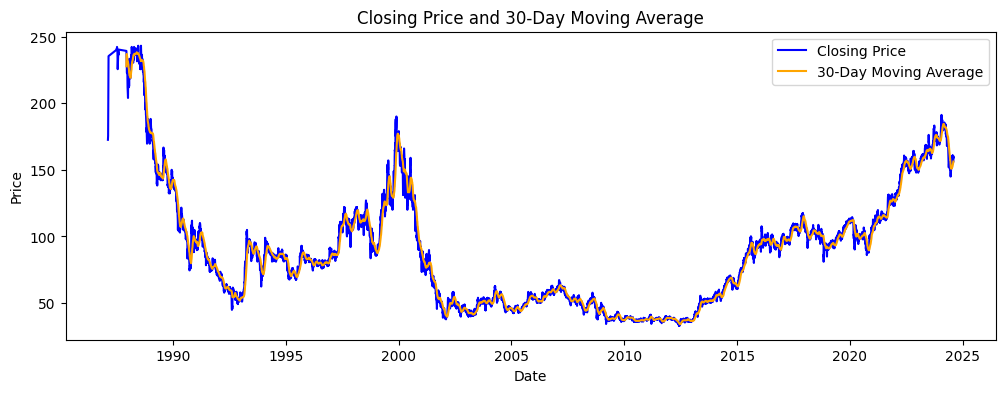

In [33]:
df['moving_avg_30'] = df['closing_price'].rolling(window=30).mean()  # 30-day moving average
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['closing_price'], label='Closing Price', color='blue')
plt.plot(df['date'], df['moving_avg_30'], label='30-Day Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 30-Day Moving Average')
plt.legend()
plt.show()


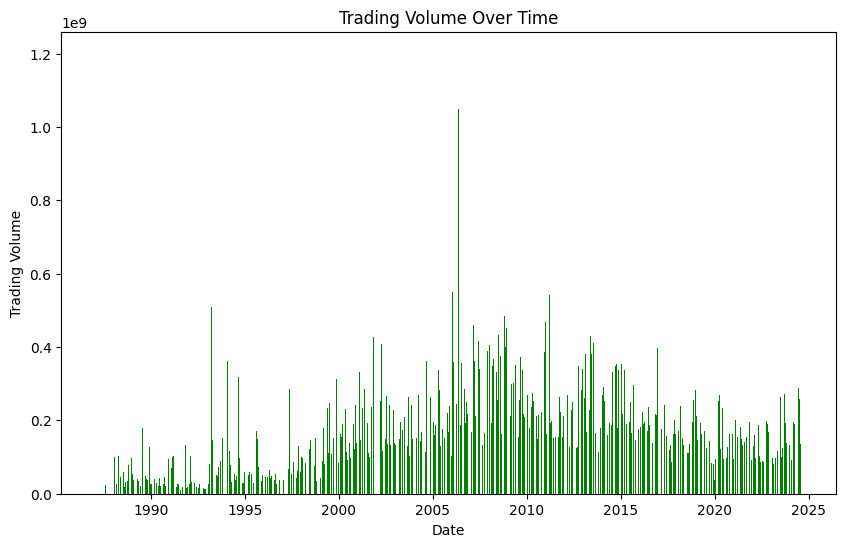

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['trading_volume'], color='green')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Trading Volume Over Time')
plt.show()


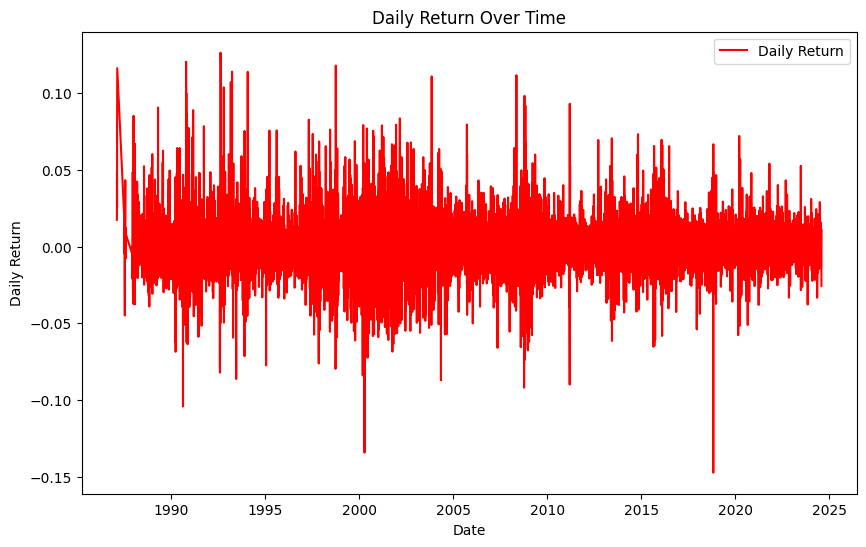

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['daily_return'], label='Daily Return', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Return Over Time')
plt.legend()
plt.show()


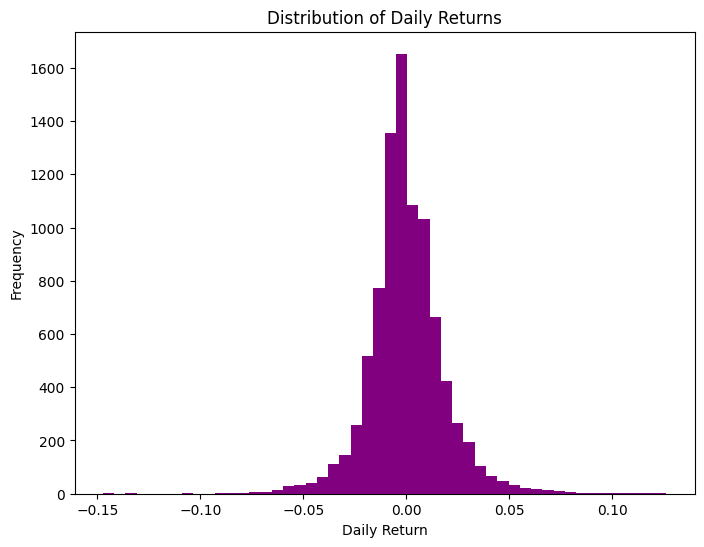

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(df['daily_return'].dropna(), bins=50, color='purple')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()


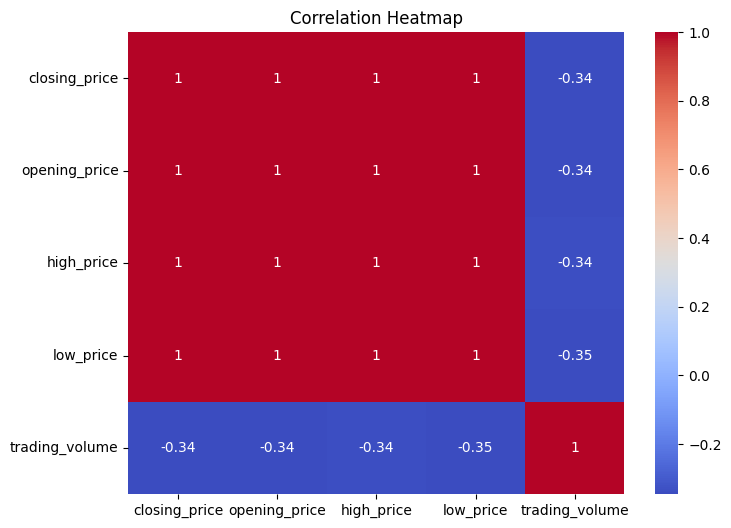

In [37]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df[['closing_price', 'opening_price', 'high_price', 'low_price', 'trading_volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


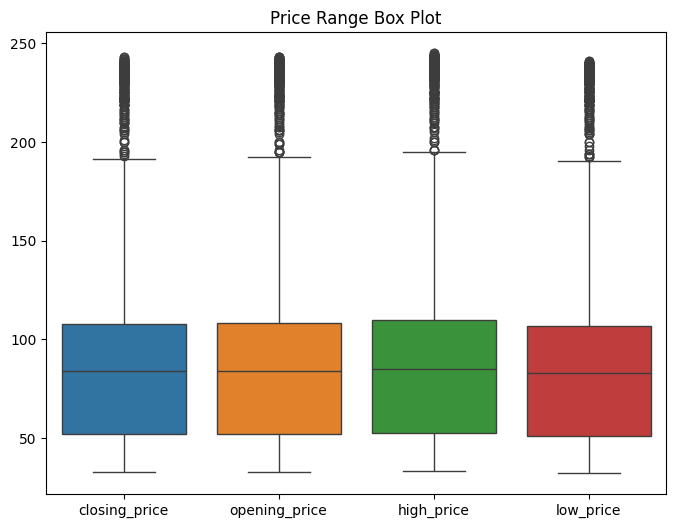

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['closing_price', 'opening_price', 'high_price', 'low_price']])
plt.title('Price Range Box Plot')
plt.show()


In [39]:
import pandas as pd

# Assuming df is your DataFrame
# Define a function to identify outliers
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

# Identify outliers for key variables
outlier_columns = ['closing_price', 'opening_price', 'high_price', 'low_price']
outlier_results = {col: identify_outliers(df, col) for col in outlier_columns}

# Print the number of outliers and their values
for col, outliers in outlier_results.items():
    print(f'Outliers in {col}:')
    print(outliers)
    print(f'Number of outliers: {len(outliers)}\n')

Outliers in closing_price:
      index       date  closing_price  opening_price  high_price  low_price  \
9196   9196 1987-02-19          196.1          196.1       196.1      193.1   
9195   9195 1987-02-20          210.8          200.0       211.8      200.0   
9194   9194 1987-02-23          235.3          214.7       235.3      211.8   
9102   9102 1987-07-06          240.2          240.2       244.1      240.2   
9101   9101 1987-07-07          241.2          240.2       243.1      240.2   
...     ...        ...            ...            ...         ...        ...   
8787   8787 1988-10-13          195.1          195.1       195.1      194.1   
8786   8786 1988-10-14          200.0          195.1       200.0      194.1   
8785   8785 1988-10-17          200.0          200.0       201.0      198.0   
8784   8784 1988-10-18          194.1          199.0       200.0      194.1   
8783   8783 1988-10-19          193.1          195.1       196.1      192.2   

      trading_volume  pe

REMOVING OUTLIERS

In [40]:
def is_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    return (data[column] < lower_bound) | (data[column] > upper_bound)

In [41]:

outlier_mask = pd.Series(False, index=df.index)

for col in outlier_columns:
    outlier_mask |= is_outlier(df, col)


filtered_df = df[~outlier_mask]

print(f'Original number of rows: {len(df)}')
print(f'Number of rows after removing outliers: {len(filtered_df)}')

Original number of rows: 9016
Number of rows after removing outliers: 8787


In [42]:
print("Summary Statistics After Removing Outliers:\n", filtered_df[['closing_price', 'opening_price', 'high_price', 'low_price']].describe())

Summary Statistics After Removing Outliers:
        closing_price  opening_price   high_price    low_price
count    8787.000000    8787.000000  8787.000000  8787.000000
mean       84.883612      84.922078    85.773950    84.080118
std        38.171484      38.206536    38.536027    37.878768
min        33.000000      33.000000    33.200000    32.200000
25%        51.500000      51.600000    52.100000    50.900000
50%        82.400000      82.500000    83.300000    81.700000
75%       106.000000     106.000000   107.100000   105.000000
max       191.200000     192.200000   194.000000   190.200000


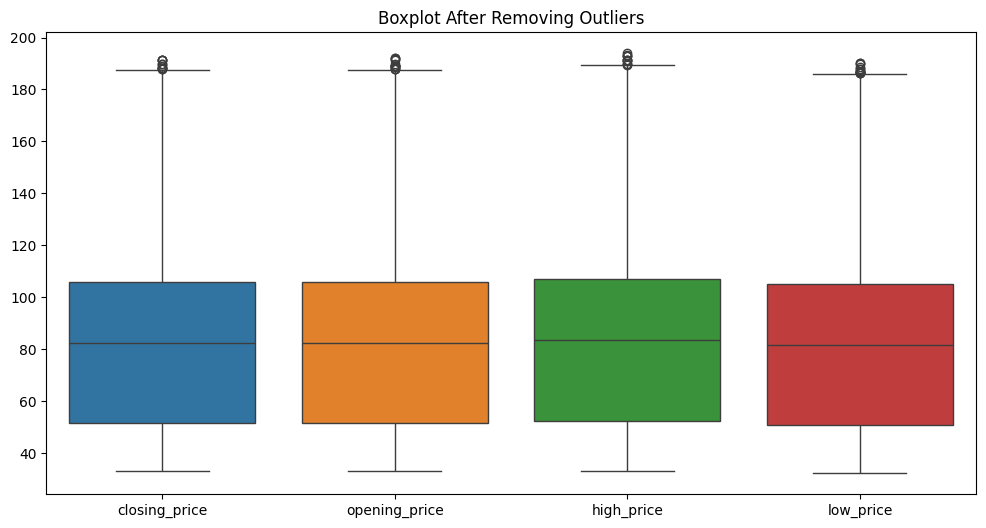

In [43]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df[['closing_price', 'opening_price', 'high_price', 'low_price']])
plt.title('Boxplot After Removing Outliers')
plt.show()

We succesfully filtered out **229** outlier from the **data**

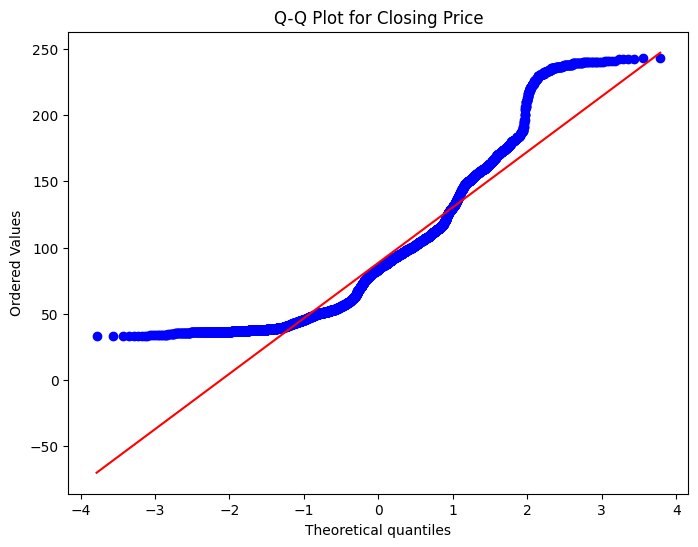

In [44]:
import scipy.stats as stats

# Q-Q plot for closing price
plt.figure(figsize=(8, 6))
stats.probplot(df['closing_price'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Closing Price')
plt.show()

In [45]:
df = filtered_df

<ipython-input-46-d92672404337>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_mean'] = df['closing_price'].rolling(window=30).mean()
<ipython-input-46-d92672404337>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_std'] = df['closing_price'].rolling(window=30).std()


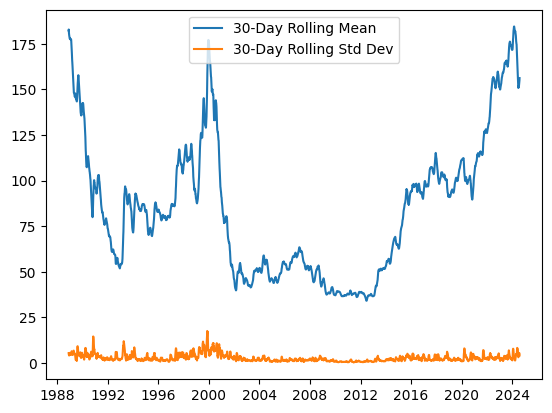

In [46]:
df['rolling_mean'] = df['closing_price'].rolling(window=30).mean()
df['rolling_std'] = df['closing_price'].rolling(window=30).std()
plt.plot(df['date'], df['rolling_mean'], label='30-Day Rolling Mean')
plt.plot(df['date'], df['rolling_std'], label='30-Day Rolling Std Dev')
plt.legend()
plt.show()

30-day rolling mean and standard deviation of closing price shows significant fluctuation, it indicates that the stock price has experienced considerable volatility over time

In [47]:
pd.to_datetime(df['date'])

,date
9200,1987-02-13
9199,1987-02-16
9198,1987-02-17
9197,1987-02-18
8782,1988-10-20
...,...
4,2024-07-26
3,2024-07-29
2,2024-07-30
1,2024-07-31


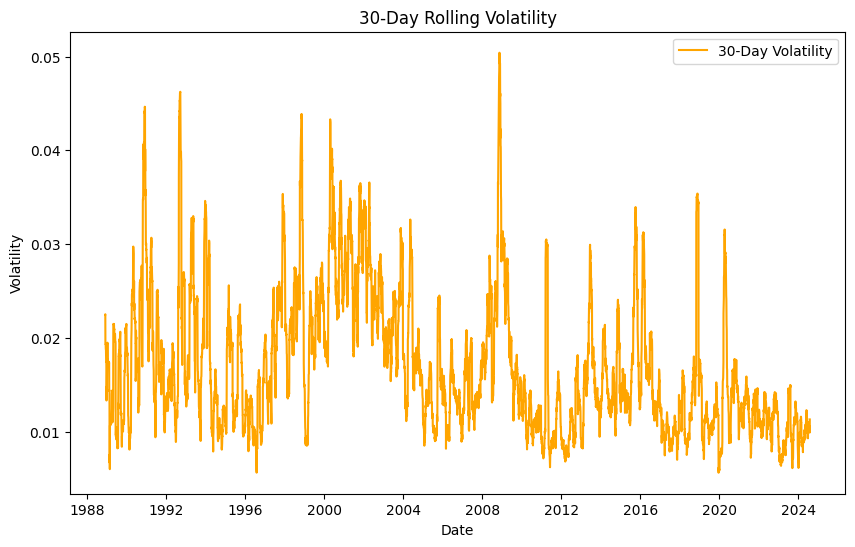

In [48]:
df['volatility_30'] = df['daily_return'].rolling(window=30).std()  # 30-day rolling volatility
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['volatility_30'], label='30-Day Volatility', color='orange')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('30-Day Rolling Volatility')
plt.legend()
plt.show()


Data have lot of fluctation and it is highly volatail, this will affect the model prediction leading to unaccurate result



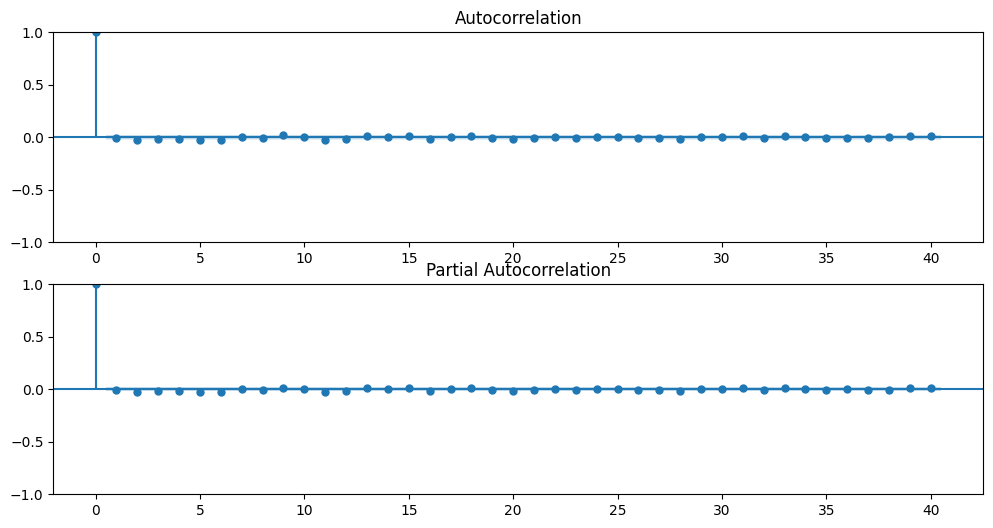

In [49]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['daily_return'].dropna(), lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['daily_return'].dropna(), lags=40, ax=plt.gca())
plt.show()


ACF and PACF plots for daily returns: doesn't provide much of insights or correlation has the results suggest no significant time dependent structure.

1.ACF plot: The ACF has a single spike at lag 0, and turn out to be zero for subsrquent lags, this indicates that the daily returns are likely uncorrelated over time.

PACF Plot: Similarly, PACF also shows sharp cutoff after lag 0, confirming that is no significant autocorreltion in the data after the initial lag.
futher suggest that daily returns are white noise or have very little memory of the past value

In [50]:
import matplotlib.pyplot as plt
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

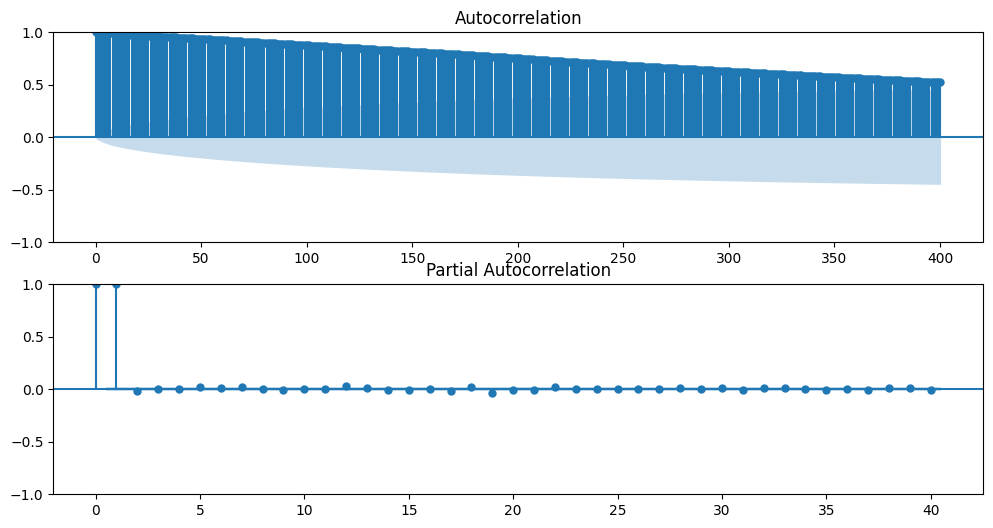

In [51]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['closing_price'].dropna(), lags=400, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['closing_price'].dropna(), lags=40, ax=plt.gca())
plt.show()


ACF plot:
1. The ACF shows persistent correlation across many lags, which suggests that the closing prices are non-stationary. This is common with stock prices as they tend to show trends over time.
2. The sharp cutoff at lag 2 suggests that an AR(2) model might capture the autoregressive bheavior of the closing prie.

This suggests that to use ARIMA(2,1,0) model
2-for the autogressive term
1- for differncing
0- for moving average

In [52]:
colsingdate = df.asfreq(pd.infer_freq(df['date']))

In [53]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-01-01')
lim_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

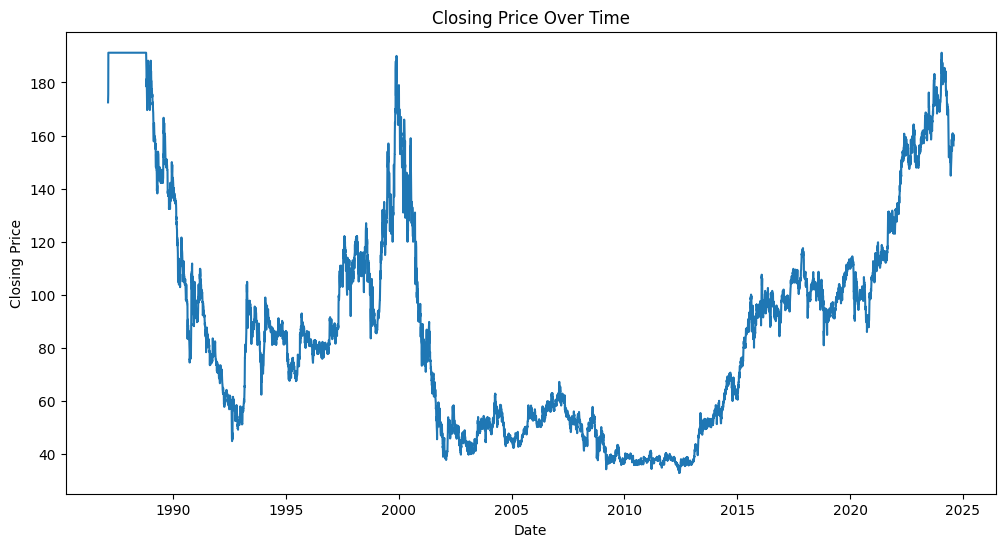

In [54]:

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing_price'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.show()


Stationarity:
Substracting the pervious value from the current value. Now if we just difference onec, we might not get a seeries so we do that multiple times and the minimum number of the differncing operation required by the model, any stationary time series can be modeled with ARIMA models

ADF test:
We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary. The null hypothesis of the ADF test is that the time series is non- stationary. So, if the p-value  of the test is less than 0.06 then we can reject the null hypothesis and infer that the time series is indeed stationary.

In [55]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['closing_price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -2.2514837102092837
p-value: 0.18809290095715625
Critical Values: {'1%': -3.43109603278911, '5%': -2.8618696970133626, '10%': -2.5669454927428745}


So, in our case p-value of 0.181 indicates that we fail to reject the null hypothesis of non-stationarity, as it is above the 0.05 significance level. The ADF statistic of -2.2716 is greater than the critical values at both the 5% (-2.8619) and 10% (-2.5669) levels, suggesting that the series is not stationary at these levels. Therefore, we conclude that the series is non-stationary

BY DIFFERNCING WE ARE TRYING TO BRING DATA TO STATIONARITY

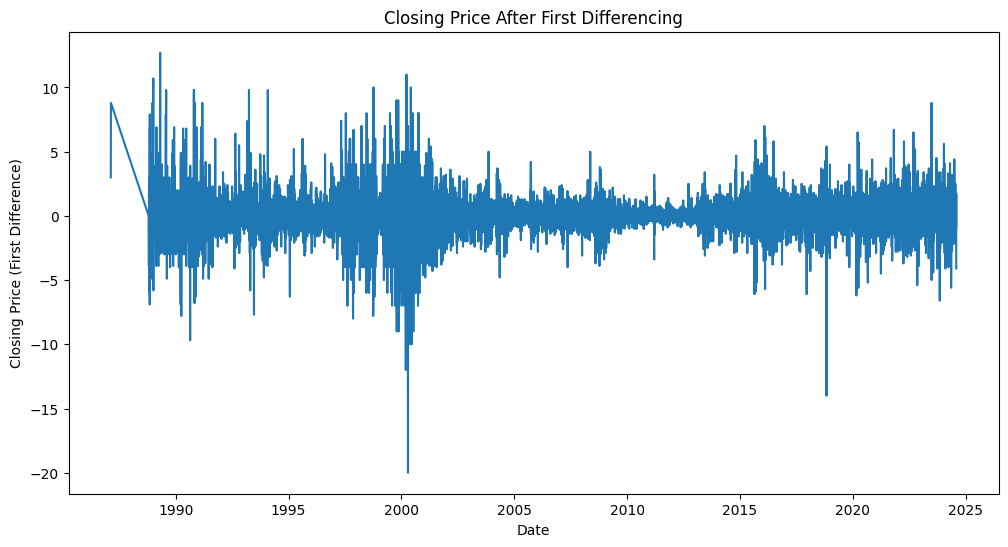

ADF Statistic: -22.23058930974383
p-value: 0.0
Critical Values: {'1%': -3.43109603278911, '5%': -2.8618696970133626, '10%': -2.5669454927428745}


In [56]:

df['closing_price_diff1'] = df['closing_price'].diff()
df = df.dropna(subset=['closing_price_diff1'])

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing_price_diff1'])
plt.xlabel('Date')
plt.ylabel('Closing Price (First Difference)')
plt.title('Closing Price After First Differencing')
plt.show()


# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['closing_price_diff1'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])



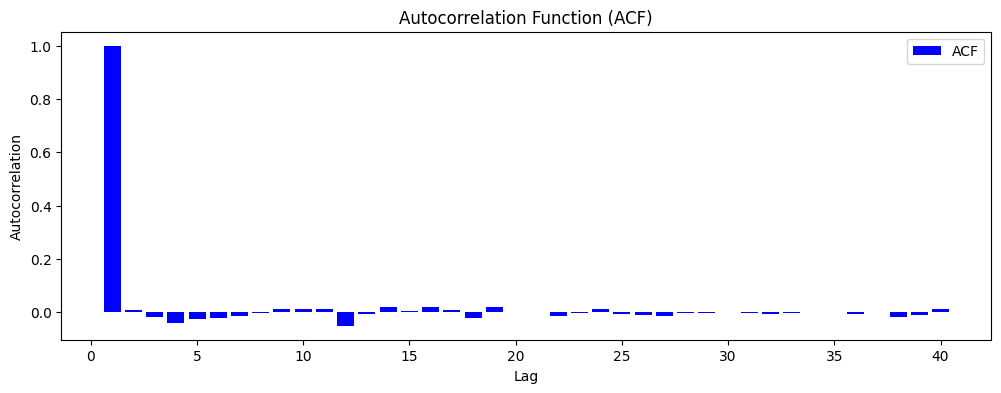

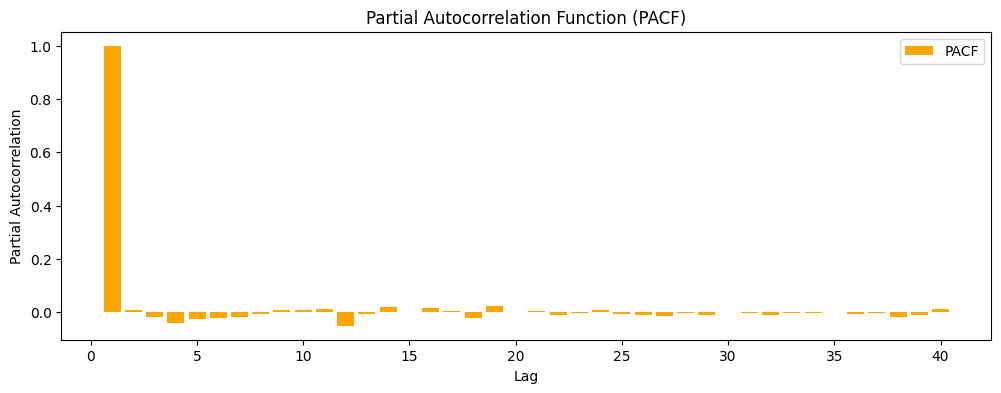

In [57]:
!pip install statsmodels

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

acf_values = acf(df['closing_price_diff1'].dropna(), nlags=40)
pacf_values = pacf(df['closing_price_diff1'].dropna(), nlags=40)

# Create the ACF plot
plt.figure(figsize=(12, 4))
plt.bar(range(1, 41), acf_values[:40], color='blue', label='ACF')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.legend()
plt.show()

# Create the PACF plot
plt.figure(figsize=(12, 4))
plt.bar(range(1, 41), pacf_values[:40], color='orange', label='PACF')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.legend()
plt.show()

<ipython-input-58-bca714dd4f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['closing_price_diff'] = df['closing_price'].diff().diff()


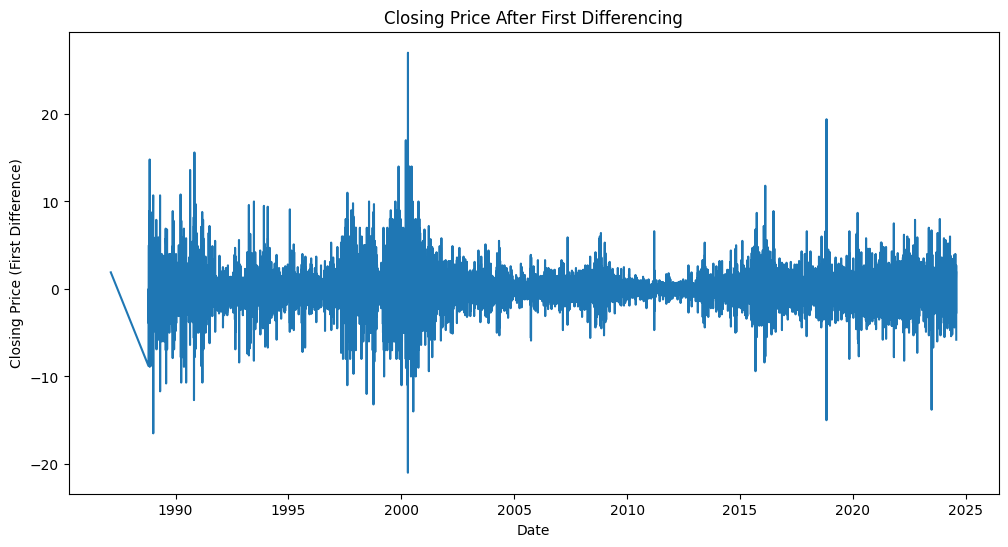

ADF Statistic: -26.08953163802686
p-value: 0.0
Critical Values: {'1%': -3.43109790993778, '5%': -2.861870526484161, '10%': -2.566945934275714}


In [58]:

df['closing_price_diff'] = df['closing_price'].diff().diff()


df = df.dropna(subset=['closing_price_diff'])

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing_price_diff'])
plt.xlabel('Date')
plt.ylabel('Closing Price (First Difference)')
plt.title('Closing Price After First Differencing')
plt.show()


# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['closing_price_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])




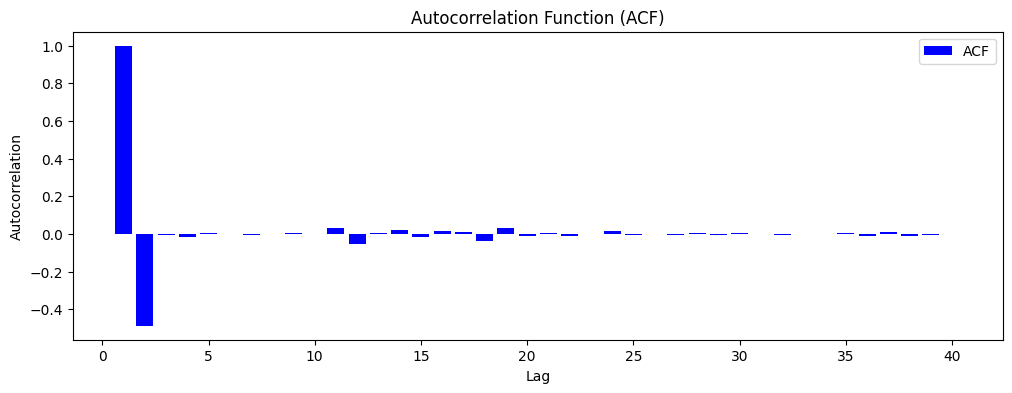

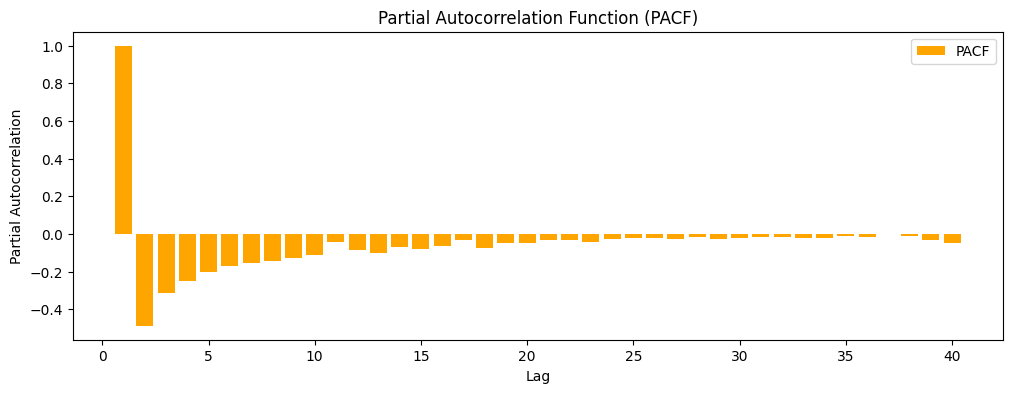

In [59]:


acf_values = acf(df['closing_price_diff'].dropna(), nlags=40)
pacf_values = pacf(df['closing_price_diff'].dropna(), nlags=40)

# Create the ACF plot
plt.figure(figsize=(12, 4))  # Use plt.figure() here
plt.bar(range(1, 41), acf_values[:40], color='blue', label='ACF')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.legend()
plt.show()

# Create the PACF plot
plt.figure(figsize=(12, 4))  # Use plt.figure() here
plt.bar(range(1, 41), pacf_values[:40], color='orange', label='PACF')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.legend()
plt.show()

DIFFERENCING twice made PCAF give highly negetive value this is overdifferncing

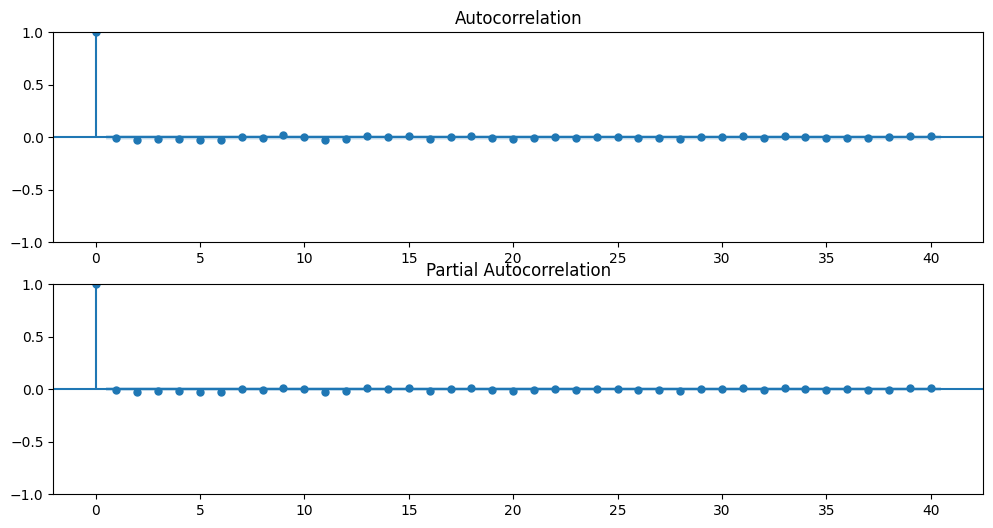

In [60]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['daily_return'].dropna(), lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['daily_return'].dropna(), lags=40, ax=plt.gca())
plt.show()


ACF and PACF plots for daily returns:
doesn't provide much of insights or correlation  has the results suggest no significant time dependent structure.

 1.ACF plot:
The ACF has a single spike at lag 0, and turn out to be zero for subsrquent lags, this indicates that the daily returns are likely uncorrelated over time.

2. PACF Plot:
Similarly, PACF also shows sharp cutoff after lag 0, confirming that is no significant autocorreltion in the data after the initial lag.

futher suggest that daily returns are white noise or have very little memory of the past value

In [61]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [62]:
splt='2023-01-12'
train_df = df[df['date']<splt]
test_df = df[df['date']>=splt]
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")


Training set size: 8400
Testing set size: 384


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Test RMSE: 1.7139996026395945


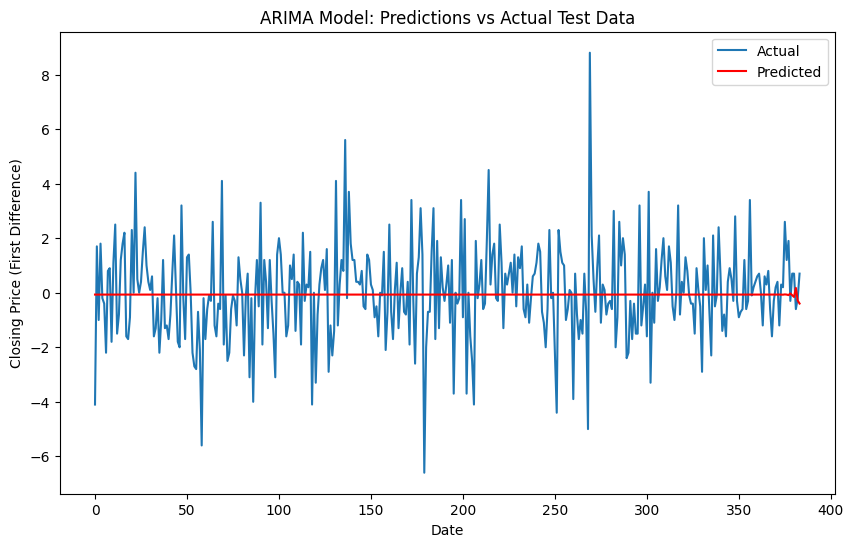

In [63]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

train = df[df['date'] < '2023-01-12']['closing_price_diff1']
test = df[df['date'] >= '2023-01-12']['closing_price_diff1']


model = ARIMA(train, order=(2, 1, 0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))


mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse}')


plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Model: Predictions vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price (First Difference)')
plt.legend()
plt.show()


Results:

Based on the above results, the ARIMA model is unable to predict market performance.

The following might be the reasons:

*   The data is highly volatile and skewed, affecting predictions

*   The inconsideration of market sentiment may have affected the results

Lets impliment LSTM :





In [64]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['closing_price_diff1']].values)

# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - loss: 0.0284
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.0051
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.0050
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0045
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0043
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0041
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0039
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0038
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0040
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0035
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0036
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0033
Epoch 13/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0032
Epoch 14/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0032
Epoch 15/100
219/219 ━

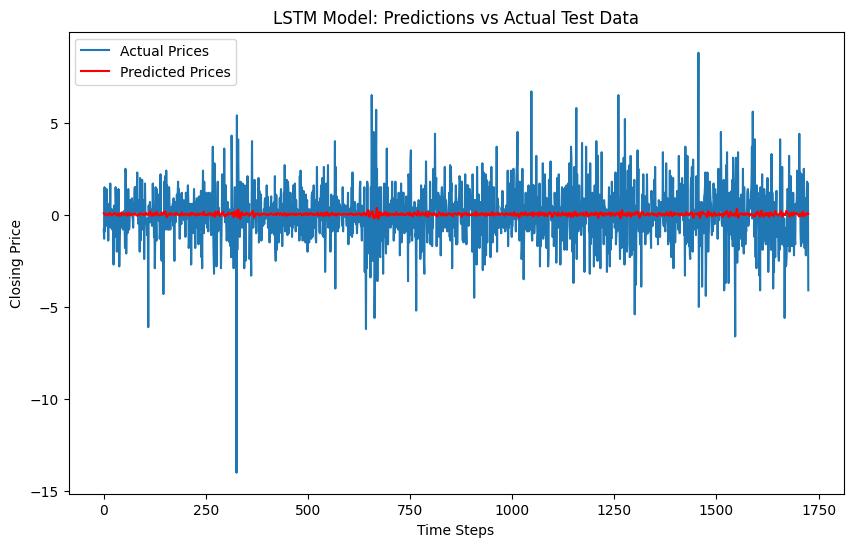

In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

predicted_prices = model_lstm.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
mse_lstm = mean_squared_error(y_test, predicted_prices)
rmse_lstm = np.sqrt(mse_lstm)
print(f'LSTM Test RMSE: {rmse_lstm}')


plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(test_data[time_step + 1:]), label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('LSTM Model: Predictions vs Actual Test Data')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

This is the result from sol lstm model, with some kind of improvement in catching the spikes.

I wanted to restart whole process


In [76]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


train = df[df['date'] < '2023-01-12']['closing_price_diff1']

# Fit ARIMA model
model_arima = ARIMA(train, order=(2, 1, 0))
model_fit = model_arima.fit()

# Get predictions and residuals
arima_predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
residuals = train - model_fit.fittedvalues
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     closing_price_diff1   No. Observations:                 8400
Model:                  ARIMA(2, 1, 0)   Log Likelihood              -17434.147
Date:                 Sun, 13 Oct 2024   AIC                          34874.295
Time:                         07:41:04   BIC                          34895.403
Sample:                              0   HQIC                         34881.502
                                - 8400                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6388      0.005   -119.330      0.000      -0.649      -0.628
ar.L2         -0.3148      0.006    -50.472      0.000      -0.327      -0.303
sigma2         3.7193      0.027    137.417      0.000       3.666       3.772
===================================================================================
Ljung-Box (L1) (Q):                  50.96   Jarque-Bera (JB):             19128.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
from sklearn.preprocessing import MinMaxScaler

# Scale residuals for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # Adjust based on your needs
X_residuals, y_residuals = create_dataset(scaled_residuals, time_step)

# Reshape input to be [samples, time steps, features]
X_residuals = X_residuals.reshape(X_residuals.shape[0], X_residuals.shape[1], 1)

Building LSTM model


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_residuals.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))


model_lstm.compile(optimizer='adam', loss='mean_squared_error')


model_lstm.fit(X_residuals, y_residuals, epochs=100, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
 38/262 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.1001

In [ ]:

predicted_residuals = model_lstm.predict(X_test)
predicted_residuals = scaler.inverse_transform(predicted_residuals)

In [ ]:
print(f'Shape of ARIMA predictions: {arima_predictions.shape}')
print(f'Shape of LSTM predicted residuals: {predicted_residuals.shape}')

In [ ]:

predicted_residuals = predicted_residuals[:len(arima_predictions)]

In [ ]:

if len(predicted_residuals) < len(arima_predictions):
    padding = np.zeros(len(arima_predictions) - len(predicted_residuals))
    predicted_residuals = np.concatenate((predicted_residuals.flatten(), padding))

Integrating ARIMA and LSTM models

In [ ]:
final_predictions = arima_predictions + predicted_residuals.flatten()

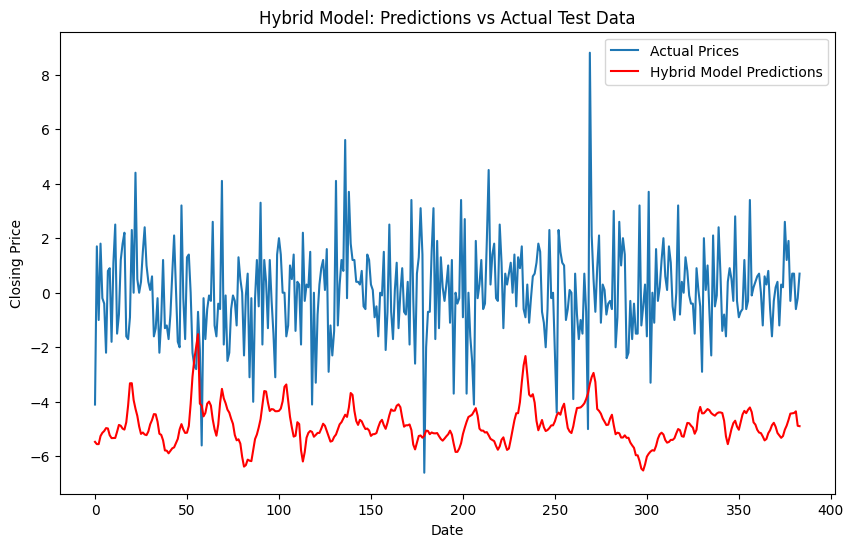

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual Prices')
plt.plot(test.index, final_predictions, label='Hybrid Model Predictions', color='red')
plt.title('Hybrid Model: Predictions vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual_values = test.values[:len(final_predictions)]  # Adjust based on length
predicted_values = final_predictions

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

# Print results
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 4.897333138616621
MSE: 27.093824568758436
RMSE: 5.205172866366538
R-squared: -8.255882668757245
